In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

The relationship looks linear and positive – as X increases, Y also increases.


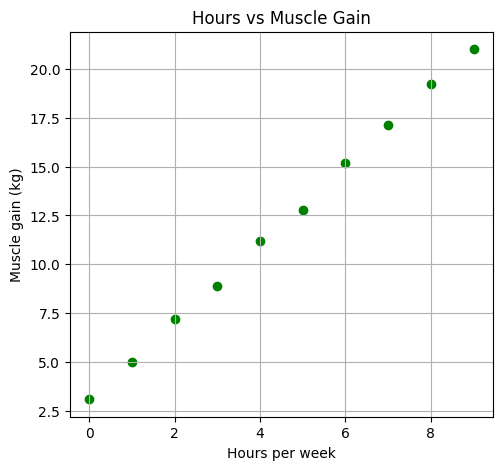

In [7]:
x1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y1 = [3.1, 5.0, 7.2, 8.9, 11.2, 12.8, 15.2, 17.1, 19.2, 21.0]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1, y1, color='green')
plt.title('Hours vs Muscle Gain')
plt.xlabel('Hours per week')
plt.ylabel('Muscle gain (kg)')
plt.grid(True)

print ("The relationship looks linear and positive – as X increases, Y also increases.")

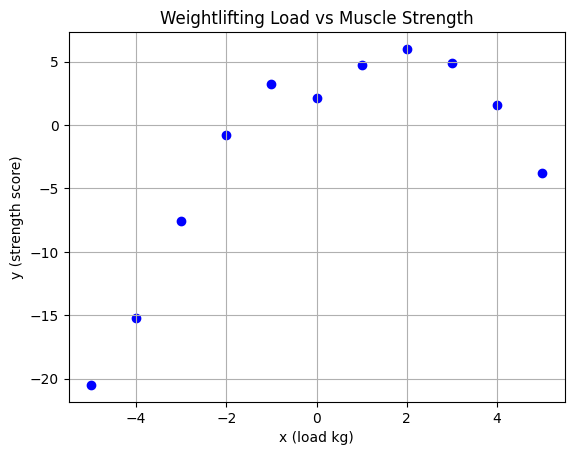

The relationship looks quadratic (parabolic) – Y increases up to a point and then decreases.


In [8]:
x = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
y = [-20.5, -15.2, -7.6, -0.8, 3.2, 2.1, 4.7, 6.0, 4.9, 1.6, -3.8]

plt.scatter(x, y, color='blue')
plt.xlabel('x (load kg)')
plt.ylabel('y (strength score)')
plt.title('Weightlifting Load vs Muscle Strength')
plt.grid(True)
plt.show()

print ("The relationship looks quadratic (parabolic) – Y increases up to a point and then decreases.")

MSE = 0.01802424242424249
R²  = 0.9994557585602966
predict 4.5 hours ==  [12.07]


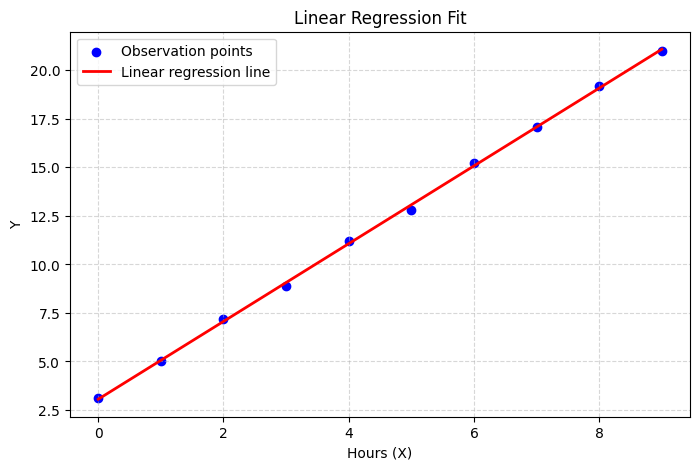

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dataset 1 (linear)
X1 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
Y1 = np.array([3.1, 5.0, 7.2, 8.9, 11.2, 12.8, 15.2, 17.1, 19.2, 21.0])

# fit
lin_model = LinearRegression()
lin_model.fit(X1, Y1)

# metrics
Y1_hat = lin_model.predict(X1)
print("MSE =", mean_squared_error(Y1, Y1_hat))
print("R²  =", r2_score(Y1, Y1_hat))

# predict 4.5
x_new = np.array([[4.5]])
y_new = lin_model.predict(x_new)
print("predict 4.5 hours == ", y_new)

# plot: line + points
plt.figure(figsize=(8, 5))
plt.scatter(X1, Y1, color='blue', label='Observation points')
x_line = np.linspace(X1.min(), X1.max(), 100).reshape(-1, 1)
y_line = lin_model.predict(x_line)
plt.plot(x_line, y_line, color='red', linewidth=2, label='Linear regression line')
plt.xlabel('Hours (X)')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


MSE = 1.3413019707565152
R²  = 0.9807079862229945
adj_r ==  0.9758849827787431
predict 0.5 load-kg ==  [5.05477273]


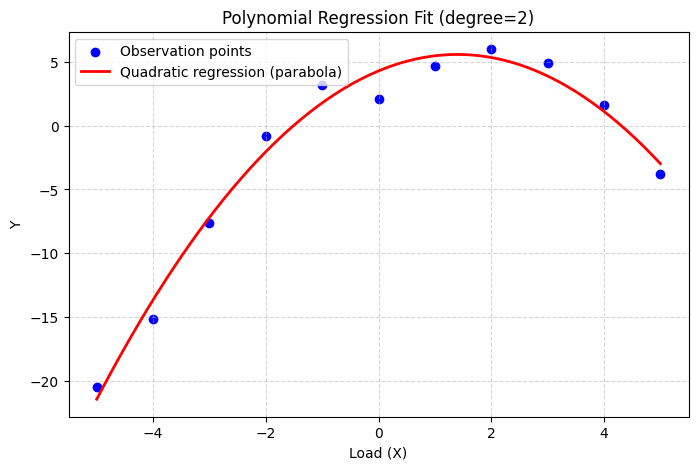

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dataset 2 (quadratic)
X2 = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]).reshape(-1, 1)
Y2 = np.array([-20.5, -15.2, -7.6, -0.8, 3.2, 2.1, 4.7, 6.0, 4.9, 1.6, -3.8])

# polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)  # columns: [x, x^2]
X2_poly = poly.fit_transform(X2)

# fit
poly_model = LinearRegression()
poly_model.fit(X2_poly, Y2)

# metrics
Y2_hat = poly_model.predict(X2_poly)
print("MSE =", mean_squared_error(Y2, Y2_hat))
print("R²  =", r2_score(Y2, Y2_hat))

# Adjusted R² (for polynomial only)
r2 = r2_score(Y2, Y2_hat)
def get_adj_r2(train_r2, X_train):
    # i.e. X_train.shape == (11, 2) -> 11 rows 2 features
    n = X_train.shape[0]
    p = X_train.shape[1]
    result = 1 - ((1 - train_r2) * (n - 1)) / (n - p - 1)
    return result
adj_r = get_adj_r2(r2, X2_poly)
print('adj_r == ', adj_r)

# predict 0.5 load-kg
x_new2 = np.array([[0.5]])
x_new2_poly = poly.transform(x_new2)
y_new2 = poly_model.predict(x_new2_poly)
print("predict 0.5 load-kg == ", y_new2)

# plot: parabola + points
plt.figure(figsize=(8, 5))
plt.scatter(X2, Y2, color='blue', label='Observation points')
x_curve = np.linspace(X2.min(), X2.max(), 200).reshape(-1, 1)
x_curve_poly = poly.transform(x_curve)
y_curve = poly_model.predict(x_curve_poly)
plt.plot(x_curve, y_curve, color='red', linewidth=2, label='Quadratic regression (parabola)')
plt.xlabel('Load (X)')
plt.ylabel('Y')
plt.title('Polynomial Regression Fit (degree=2)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
